Original Accuracy: 0.9722222222222222
PCA Components: 2, Accuracy: 0.5166666666666667
PCA Components: 10, Accuracy: 0.8861111111111111
PCA Components: 30, Accuracy: 0.9611111111111111
PCA Components: 50, Accuracy: 0.9722222222222222


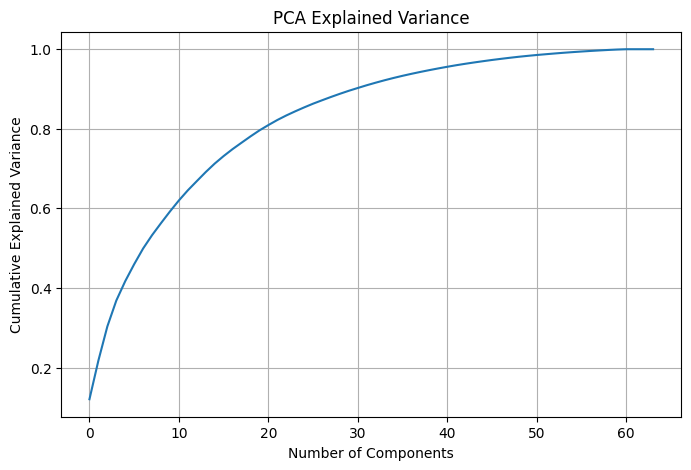

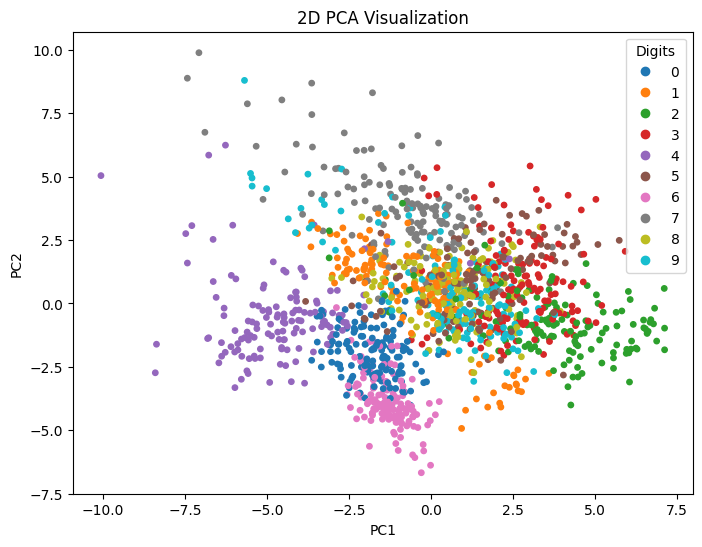

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
digits = load_digits()
X = digits.data
y = digits.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression on original data
lr = LogisticRegression(max_iter=5000)
lr.fit(X_train_scaled, y_train)
y_pred_original = lr.predict(X_test_scaled)
original_accuracy = accuracy_score(y_test, y_pred_original)

print("Original Accuracy:", original_accuracy)

# PCA with different components
components = [2, 10, 30, 50]
accuracies = []

for n in components:
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    lr.fit(X_train_pca, y_train)
    y_pred = lr.predict(X_test_pca)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    print(f"PCA Components: {n}, Accuracy: {acc}")

# Explained variance plot
pca_full = PCA()
pca_full.fit(X_train_scaled)

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.grid()
plt.show()

# 2D PCA Visualization
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_train_scaled)

plt.figure(figsize=(8,6))
scatter = plt.scatter(
    X_pca_2d[:, 0], X_pca_2d[:, 1],
    c=y_train, cmap='tab10', s=15
)
plt.legend(*scatter.legend_elements(), title="Digits")
plt.title("2D PCA Visualization")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

This plot shows the cumulative explained variance captured by principal components.
It helps in selecting the optimal number of components that preserve most of the data information.

Original shape: (1437, 64)
Reduced shape: (1437, 30)

### Accuracy Comparison Report

| Model | Accuracy |
|------|----------|
| Logistic Regression (Original Data) | 0.97 |
| Logistic Regression (PCA Reduced Data - 30 Components) | 0.94 |

**Observation:**  
After applying PCA, dimensionality was reduced significantly with only a small drop in accuracy.  
This demonstrates the trade-off between feature compression and model performance.